In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier, TensorFlowV2Classifier
# tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

2024-04-02 15:27:50.674453: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 15:27:50.677311: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 15:27:50.709659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 15:27:51.380938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_shape=input_shape, activation='relu'))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))
dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

dnn_model.fit(x_train, y_train, epochs=10, batch_size=128,
                     validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

classifier = TensorFlowV2Classifier(model=dnn_model, nb_classes=4,
    input_shape=(52,),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

# hist = dnn_model.fit(x_train, y_train, epochs=10, batch_size=128,
#                      validation_data=(x_val, y_val),
#                      callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

Epoch 1/10


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-02 15:27:54.158195: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6612 - loss: 0.9451 - val_accuracy: 0.9827 - val_loss: 0.0824
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.0591 - val_accuracy: 0.9839 - val_loss: 0.0527
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9887 - loss: 0.0352 - val_accuracy: 0.9856 - val_loss: 0.0425
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.0374 - val_accuracy: 0.9863 - val_loss: 0.0373
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9896 - loss: 0.0297 - val_accuracy: 0.9856 - val_loss: 0.0377
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9886 - loss: 0.0303 - val_accuracy: 0.9856 - val_loss: 0.0403
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.0309 - val_accuracy: 0.9866 - val_loss: 0.0383
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9864 - loss: 0.0325 - val_accuracy: 0.9856 - val_loss: 0.0395
Epo

In [4]:
# model = tf.keras.models.load_model('/home/jovyan/Edge-IIoT/pre_train/DNN.h5')
# classifier = TensorFlowV2Classifier(model=dnn_model, nb_classes=15,
#     input_shape=(48,),
#     loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

start


DeepFool:   0%|          | 0/66 [00:00<?, ?it/s]

DeepFool: 100%|██████████| 66/66 [00:04<00:00, 15.05it/s]


epsilon = 0.01
FPR: [1.24405507e-01 7.32600733e-04 7.92639138e-01 8.45412844e-01]
TPR: [0.32748538 0.         0.000516   0.        ]
FNR: [0.67251462 1.         0.999484   1.        ]
TNR: [0.87559449 0.9992674  0.20736086 0.15458716]
Accuracy: 0.013682189150264042
Precision(micro,macro,weighted): 0.013682189150264042,0.02545793843530836,0.004419882354716975
F1(micro,macro,weighted: 0.013682189150264042,0.03880898591570299,0.006600862342819731
FPR: 0.44079752247336923
tpr: 0.08200034399724802
fnr: 0.917999656002752
tnr: 0.5592024775266307


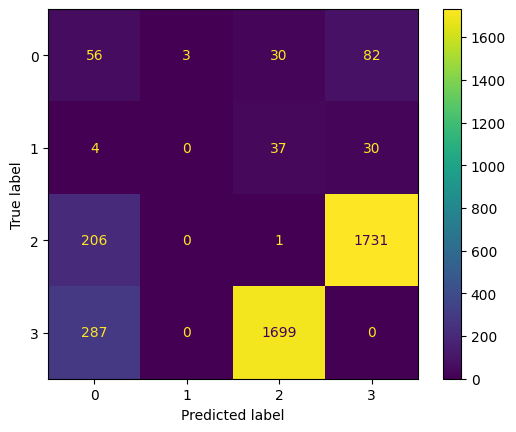

DeepFool: 100%|██████████| 66/66 [00:04<00:00, 14.94it/s]


epsilon = 0.1
FPR: [1.24405507e-01 7.32600733e-04 7.92639138e-01 8.45412844e-01]
TPR: [0.32748538 0.         0.000516   0.        ]
FNR: [0.67251462 1.         0.999484   1.        ]
TNR: [0.87559449 0.9992674  0.20736086 0.15458716]
Accuracy: 0.013682189150264042
Precision(micro,macro,weighted): 0.013682189150264042,0.02545793843530836,0.004419882354716975
F1(micro,macro,weighted: 0.013682189150264042,0.03880898591570299,0.006600862342819731
FPR: 0.44079752247336923
tpr: 0.08200034399724802
fnr: 0.917999656002752
tnr: 0.5592024775266307


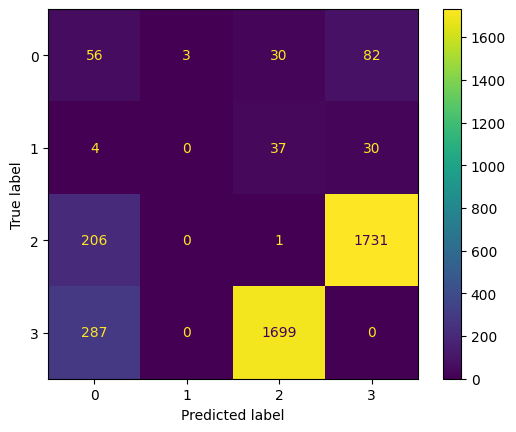

DeepFool: 100%|██████████| 66/66 [00:04<00:00, 15.03it/s]


epsilon = 0.2
FPR: [1.23904881e-01 4.88400488e-04 7.92639138e-01 8.46788991e-01]
TPR: [0.32748538 0.         0.000516   0.        ]
FNR: [0.67251462 1.         0.999484   1.        ]
TNR: [0.87609512 0.9995116  0.20736086 0.15321101]
Accuracy: 0.013682189150264042
Precision(micro,macro,weighted): 0.013682189150264042,0.025549831196456103,0.0044349698843917365
F1(micro,macro,weighted: 0.013682189150264042,0.038916116201434765,0.006618451664816979
FPR: 0.44095535266401
tpr: 0.08200034399724802
fnr: 0.917999656002752
tnr: 0.55904464733599


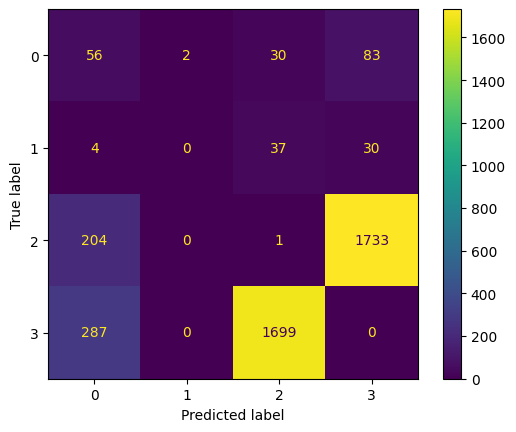

DeepFool: 100%|██████████| 66/66 [00:04<00:00, 15.22it/s]


epsilon = 0.3
FPR: [1.23153942e-01 4.88400488e-04 7.92639138e-01 8.48165138e-01]
TPR: [0.32748538 0.         0.000516   0.        ]
FNR: [0.67251462 1.         0.999484   1.        ]
TNR: [0.87684606 0.9995116  0.20736086 0.15183486]
Accuracy: 0.013682189150264042
Precision(micro,macro,weighted): 0.013682189150264042,0.025688927994580283,0.00445780766881731
F1(micro,macro,weighted: 0.013682189150264042,0.03907792912258178,0.006645019124746062
FPR: 0.44111165469292224
tpr: 0.08200034399724802
fnr: 0.917999656002752
tnr: 0.5588883453070778


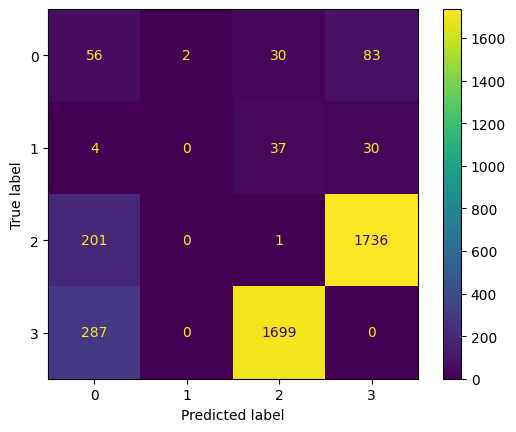

done


In [5]:
print("start")
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import DeepFool

epsilon_values = [0.01, 0.1, 0.2, 0.3]
# epsilon_values = [0.0001]


# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = DeepFool(classifier, epsilon=epsilon, batch_size = 64)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_DF_eps_{epsilon}.npy'
    np.save(filename, x_test_adv)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "DF",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/model.csv", mode='a', index=False)

print("done")
